In [1]:
# Load the processed Excel file into a DataFrame, show shape + a quick preview, then scale age + pct_time_affected_ord for PCA.
# Install deps (run once)
!pip -q install pandas openpyxl scikit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)

print("Original shape:", df.shape)

# ✅ Drop any column whose NAME contains "Unknown"
df = df.loc[:, ~df.columns.str.contains("Unknown", case=False, na=False)]

print("After dropping 'Unknown' cols:", df.shape)
display(df.head(5))

# Scale the two numeric columns (only if they still exist)
num_cols = ["What is your age?", "pct_time_affected_ord"]
num_cols = [c for c in num_cols if c in df.columns]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.copy()
print("X shape:", X.shape)
display(X[num_cols].head(10))



Original shape: (1433, 204)
After dropping 'Unknown' cols: (1433, 170)


,Are you self-employed?,Is your employer primarily a tech company/organization?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,pct_time_affected_ord,company_size_1-5,company_size_6-25,company_size_26-100,company_size_100-500,...,mhcond_Substance Use Disorder,mhcond_Addictive Disorder,"mhcond_Eating Disorder (Anorexia, Bulimia, etc)","mhcond_Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",mhcond_Dissociative Disorder,mhcond_Autism,mhcond_Depression,mhcond_Other,mhcare_options_Yes,mhcare_options_No
0,0,1,1,0,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,29,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,38,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,43,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


X shape: (1433, 170)


,What is your age?,pct_time_affected_ord
0,0.417639,-0.358707
1,-0.468337,-0.358707
2,0.329041,-0.358707
3,0.772029,1.030557
4,0.772029,-0.358707
5,0.683432,-0.358707
6,-0.379739,-0.358707
7,0.240444,-0.358707
8,0.860627,-0.358707
9,-0.379739,1.030557


Original dims: 170
PCA dims (95% var): 111
Best k by BIC: 2
Best k by AIC: 10


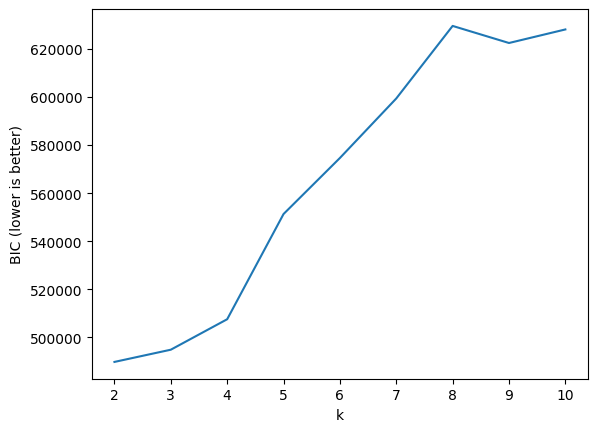

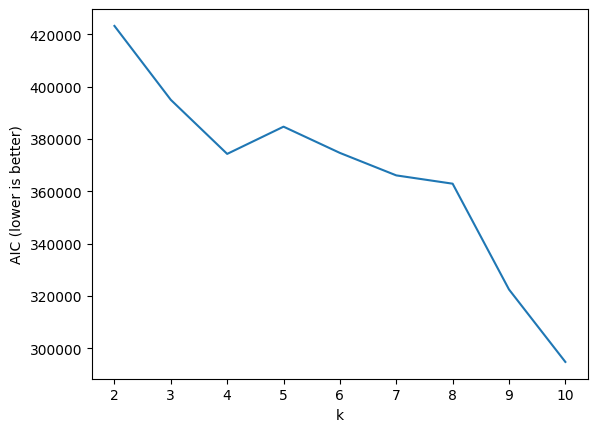

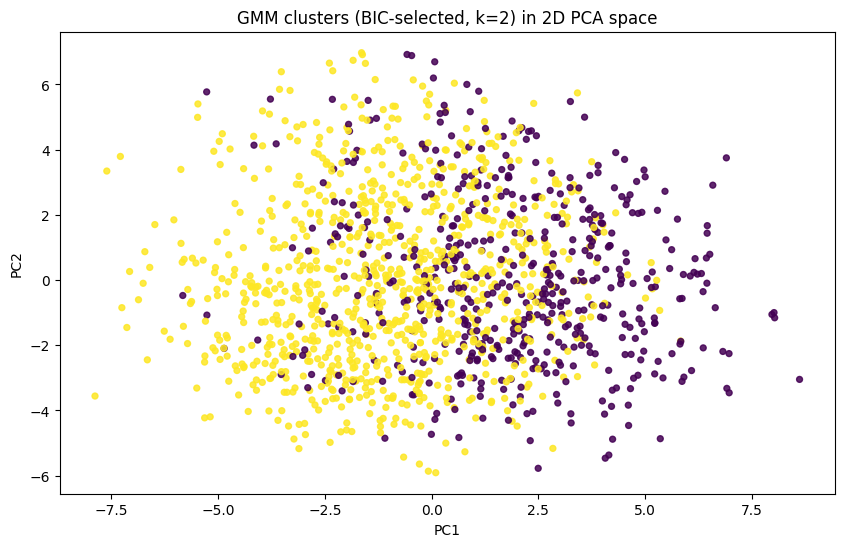

Cluster counts (BIC-selected): {0: 515, 1: 918}


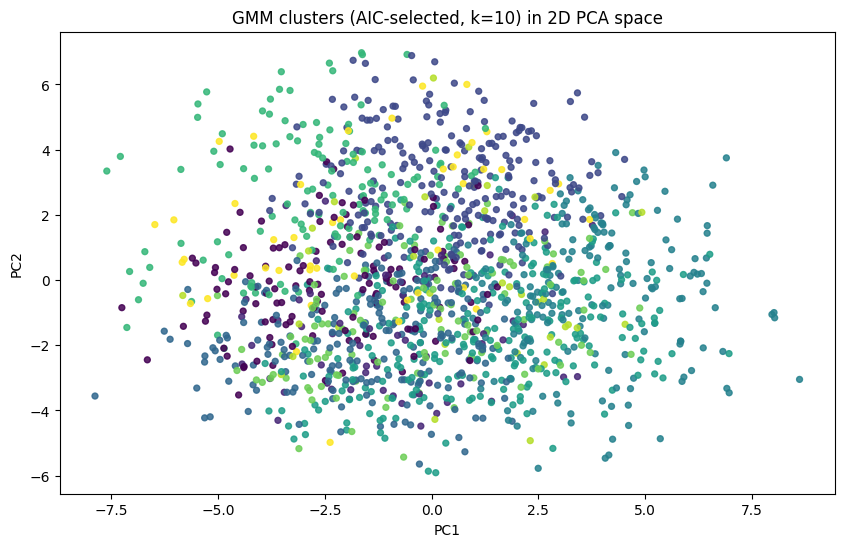

Cluster counts (AIC-selected): {0: 127, 1: 57, 2: 249, 3: 218, 4: 193, 5: 256, 6: 132, 7: 118, 8: 34, 9: 49}

Top variables driving PC1 (absolute loadings):
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_Yes                                             0.203581
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_Yes               0.201084
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No                                       0.183805
mhcond_No                                                                                                                                               0.182373
mhcond_No.1                                                                                                                                             0.182373
yn__Do you think that discussing a men

In [2]:
# Fit two GMM models (one picked by BIC, one by AIC), plot both in 2D PCA space, and list the top feature loadings for PC1/PC2 (most influential variables).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

feature_names = df.columns.to_list()

X = df.apply(pd.to_numeric, errors="coerce").fillna(0).values
X_scaled = StandardScaler().fit_transform(X)

pca95 = PCA(n_components=0.95, random_state=42)
Z95 = pca95.fit_transform(X_scaled)
print("Original dims:", X.shape[1])
print("PCA dims (95% var):", Z95.shape[1])

ks = range(2, 11)
bics, aics = [], []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=3)
    gmm.fit(Z95)
    bics.append(gmm.bic(Z95))
    aics.append(gmm.aic(Z95))

best_k_bic = list(ks)[int(np.argmin(bics))]
best_k_aic = list(ks)[int(np.argmin(aics))]
print("Best k by BIC:", best_k_bic)
print("Best k by AIC:", best_k_aic)

plt.figure()
plt.plot(list(ks), bics)
plt.xlabel("k")
plt.ylabel("BIC (lower is better)")
plt.show()

plt.figure()
plt.plot(list(ks), aics)
plt.xlabel("k")
plt.ylabel("AIC (lower is better)")
plt.show()

pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(X_scaled)

def fit_and_plot_gmm(k, title_suffix):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=5)
    labels = gmm.fit_predict(Z95)
    plt.figure(figsize=(10, 6))
    plt.scatter(Z2[:, 0], Z2[:, 1], c=labels, s=18, alpha=0.85)
    plt.title(f"GMM clusters ({title_suffix}, k={k}) in 2D PCA space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    print(f"Cluster counts ({title_suffix}):", pd.Series(labels).value_counts().sort_index().to_dict())
    return labels

labels_bic = fit_and_plot_gmm(best_k_bic, "BIC-selected")
labels_aic = fit_and_plot_gmm(best_k_aic, "AIC-selected")

top_n = 20
loadings = pd.DataFrame(
    np.abs(pca2.components_.T),
    index=feature_names,
    columns=["PC1_loading_abs", "PC2_loading_abs"]
)

top_pc1 = loadings["PC1_loading_abs"].sort_values(ascending=False).head(top_n)
top_pc2 = loadings["PC2_loading_abs"].sort_values(ascending=False).head(top_n)

print("\nTop variables driving PC1 (absolute loadings):")
print(top_pc1)

print("\nTop variables driving PC2 (absolute loadings):")
print(top_pc2)



In [3]:
# Drops one-hot location + mh condition columns from df (in-memory)

drop_prefixes = ("live_country_", "work_country_", "mhcond_")
cols_to_drop = [c for c in df.columns if c.startswith(drop_prefixes)]

print("Original shape:", df.shape)
print("Dropping:", len(cols_to_drop))
print("Examples:", cols_to_drop[:20])

df = df.drop(columns=cols_to_drop, errors="ignore")

print("New shape:", df.shape)


Original shape: (1433, 170)
Dropping: 49
Examples: ['live_country_Australia', 'live_country_Brazil', 'live_country_Canada', 'live_country_France', 'live_country_Germany', 'live_country_Ireland', 'live_country_Midwest', 'live_country_Netherlands', 'live_country_Northeast', 'live_country_Other', 'live_country_Russia', 'live_country_South America', 'live_country_Sweden', 'live_country_Switzerland', 'live_country_United Kingdom', 'live_country_West America', 'work_country_Australia', 'work_country_Brazil', 'work_country_Canada', 'work_country_France']
New shape: (1433, 121)


Original dims: 121
PCA dims (95% var): 86
Best k by BIC: 4
Best k by AIC: 10


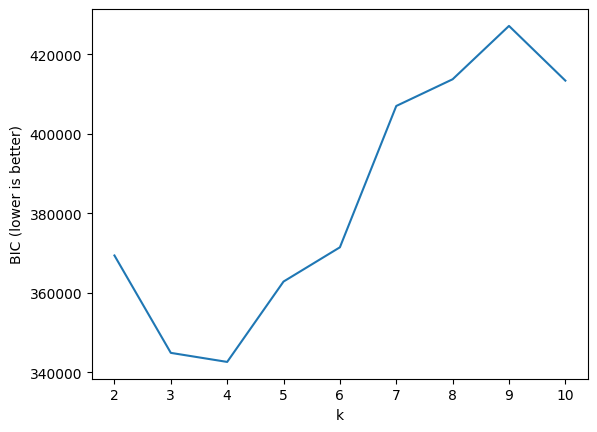

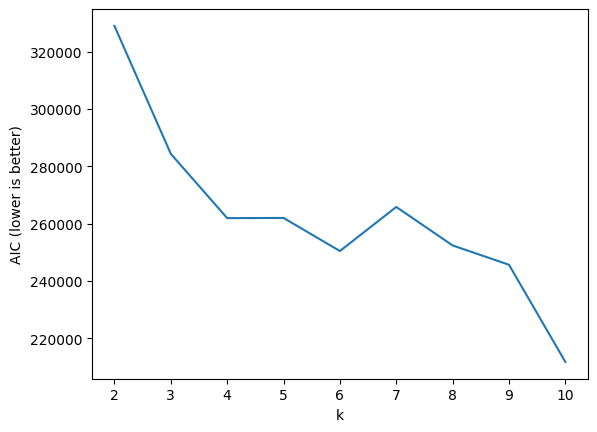

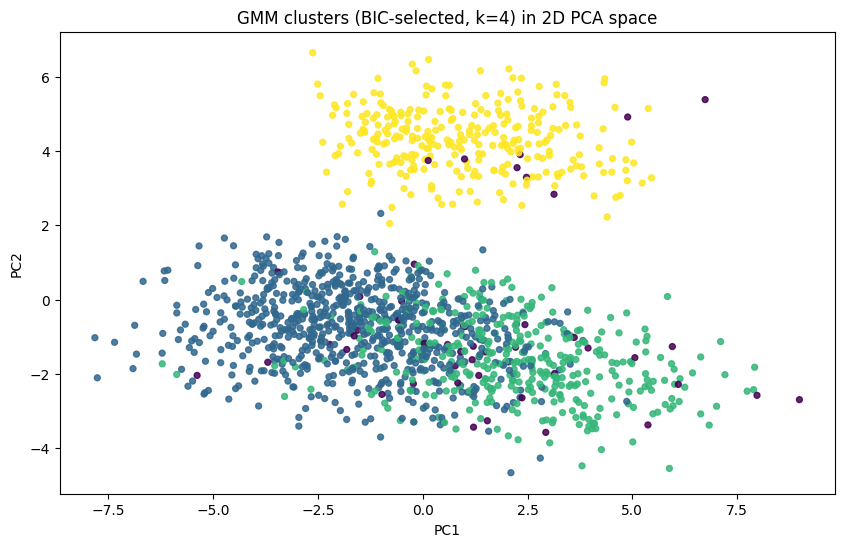

Cluster counts (BIC-selected): {0: 49, 1: 720, 2: 385, 3: 279}


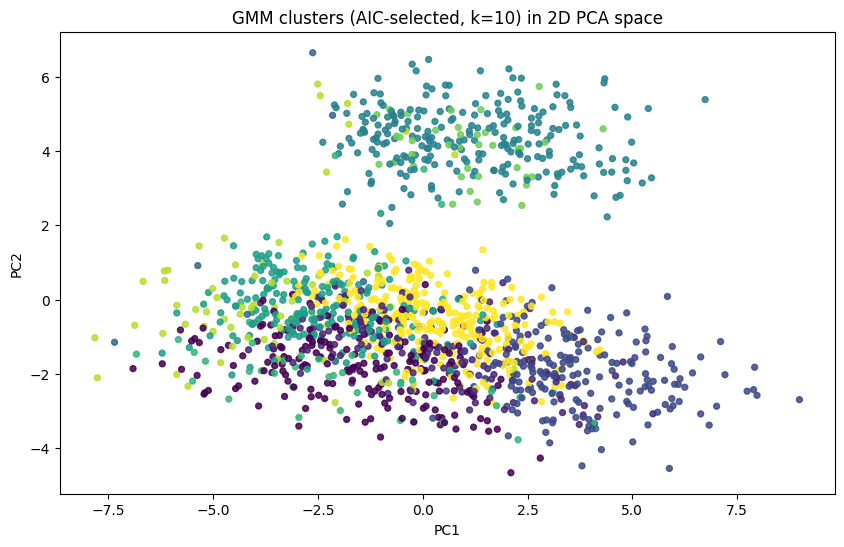

Cluster counts (AIC-selected): {0: 210, 1: 130, 2: 200, 3: 12, 4: 237, 5: 208, 6: 47, 7: 38, 8: 66, 9: 285}

Top variables driving PC1 (absolute loadings):
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_Yes                                             0.228522
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_Yes               0.226574
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes                                                  0.210093
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No                                       0.196807
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_Yes                                      0.193450
yn__Do you feel that your employer take

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

feature_names = df.columns.to_list()

X = df.apply(pd.to_numeric, errors="coerce").fillna(0).values
X_scaled = StandardScaler().fit_transform(X)

pca95 = PCA(n_components=0.95, random_state=42)
Z95 = pca95.fit_transform(X_scaled)
print("Original dims:", X.shape[1])
print("PCA dims (95% var):", Z95.shape[1])

ks = range(2, 11)
bics, aics = [], []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=3)
    gmm.fit(Z95)
    bics.append(gmm.bic(Z95))
    aics.append(gmm.aic(Z95))

best_k_bic = list(ks)[int(np.argmin(bics))]
best_k_aic = list(ks)[int(np.argmin(aics))]
print("Best k by BIC:", best_k_bic)
print("Best k by AIC:", best_k_aic)

plt.figure()
plt.plot(list(ks), bics)
plt.xlabel("k")
plt.ylabel("BIC (lower is better)")
plt.show()

plt.figure()
plt.plot(list(ks), aics)
plt.xlabel("k")
plt.ylabel("AIC (lower is better)")
plt.show()

pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(X_scaled)

def fit_and_plot_gmm(k, title_suffix):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=5)
    labels = gmm.fit_predict(Z95)
    plt.figure(figsize=(10, 6))
    plt.scatter(Z2[:, 0], Z2[:, 1], c=labels, s=18, alpha=0.85)
    plt.title(f"GMM clusters ({title_suffix}, k={k}) in 2D PCA space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    print(f"Cluster counts ({title_suffix}):", pd.Series(labels).value_counts().sort_index().to_dict())
    return labels

labels_bic = fit_and_plot_gmm(best_k_bic, "BIC-selected")
labels_aic = fit_and_plot_gmm(best_k_aic, "AIC-selected")

top_n = 20
loadings = pd.DataFrame(
    np.abs(pca2.components_.T),
    index=feature_names,
    columns=["PC1_loading_abs", "PC2_loading_abs"]
)

top_pc1 = loadings["PC1_loading_abs"].sort_values(ascending=False).head(top_n)
top_pc2 = loadings["PC2_loading_abs"].sort_values(ascending=False).head(top_n)

print("\nTop variables driving PC1 (absolute loadings):")
print(top_pc1)

print("\nTop variables driving PC2 (absolute loadings):")
print(top_pc2)

In [5]:
file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)

print("Original shape:", df.shape)

# ✅ Drop any column whose NAME contains "Unknown"
df = df.loc[:, ~df.columns.str.contains("Unknown", case=False, na=False)]

print("After dropping 'Unknown' cols:", df.shape)
display(df.head(5))

# Scale the two numeric columns (only if they still exist)
num_cols = ["What is your age?", "pct_time_affected_ord"]
num_cols = [c for c in num_cols if c in df.columns]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.copy()
print("X shape:", X.shape)
display(X[num_cols].head(10))

Original shape: (1433, 204)
After dropping 'Unknown' cols: (1433, 170)


,Are you self-employed?,Is your employer primarily a tech company/organization?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,pct_time_affected_ord,company_size_1-5,company_size_6-25,company_size_26-100,company_size_100-500,...,mhcond_Substance Use Disorder,mhcond_Addictive Disorder,"mhcond_Eating Disorder (Anorexia, Bulimia, etc)","mhcond_Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",mhcond_Dissociative Disorder,mhcond_Autism,mhcond_Depression,mhcond_Other,mhcare_options_Yes,mhcare_options_No
0,0,1,1,0,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,29,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,38,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,43,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


X shape: (1433, 170)


,What is your age?,pct_time_affected_ord
0,0.417639,-0.358707
1,-0.468337,-0.358707
2,0.329041,-0.358707
3,0.772029,1.030557
4,0.772029,-0.358707
5,0.683432,-0.358707
6,-0.379739,-0.358707
7,0.240444,-0.358707
8,0.860627,-0.358707
9,-0.379739,1.030557


Original shape: (1433, 204)
After dropping 'Unknown' columns: (1433, 170)
SVD dims: 50
Explained variance ratio (first 10): [0.0178 0.0754 0.0588 0.0524 0.0441 0.0319 0.0277 0.025  0.0204 0.0191]
Cumulative explained variance: 0.7809807941755913
Best k by BIC: 2
Best k by AIC: 6


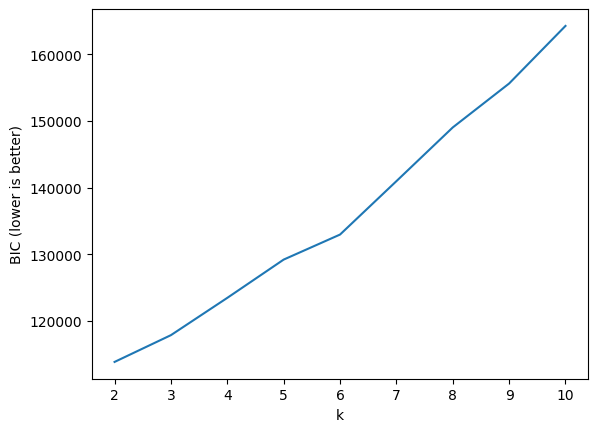

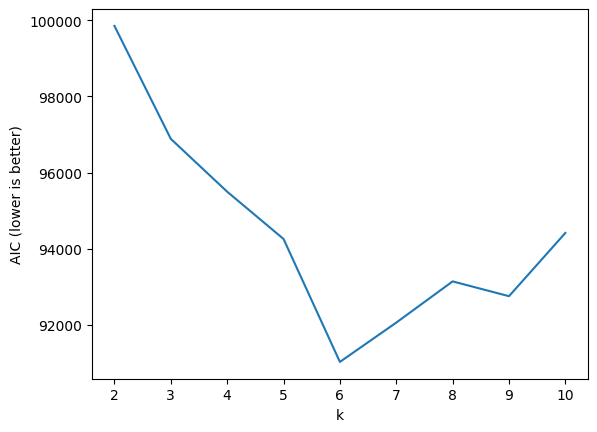

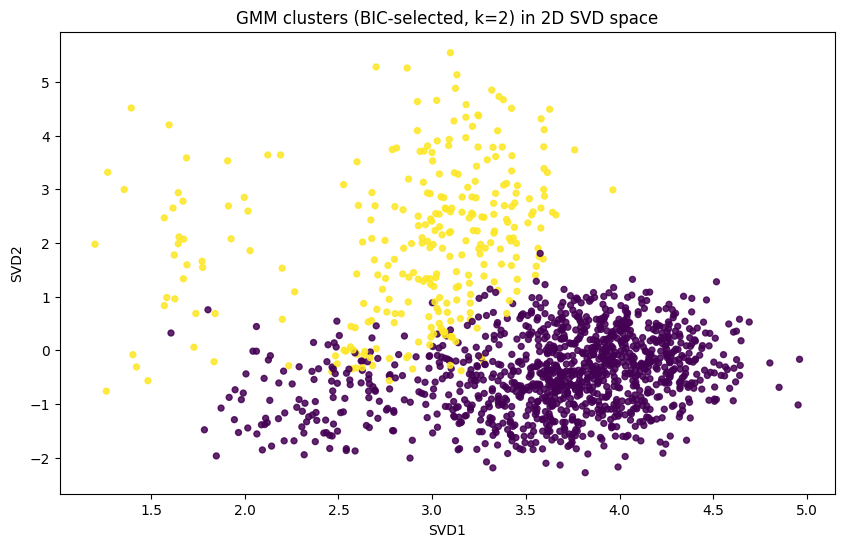

Cluster counts (BIC-selected): {0: 1145, 1: 288}


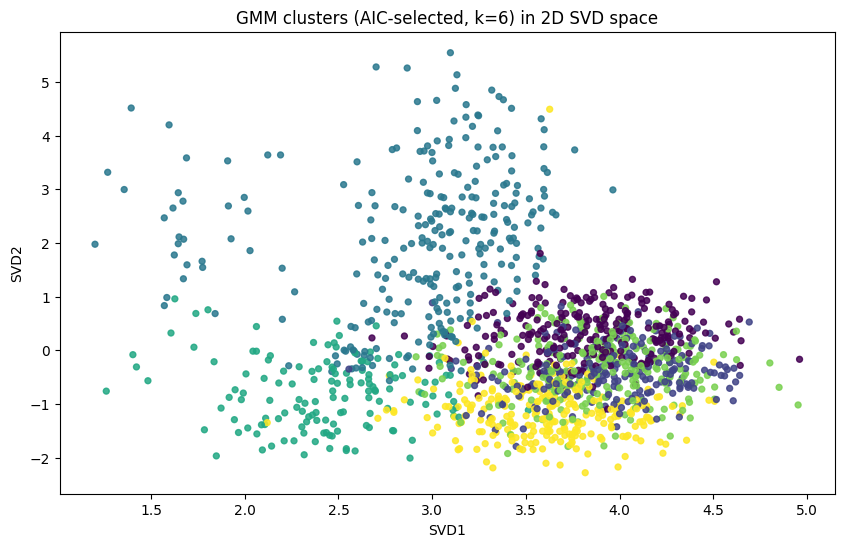

Cluster counts (AIC-selected): {0: 262, 1: 234, 2: 279, 3: 139, 4: 261, 5: 258}

Top variables driving SVD1 (absolute loadings):


,SVD1_loading_abs
Do you have previous employers?,0.254489
Is your employer primarily a tech company/organization?,0.226597
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.211576
gender_Male,0.203454
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_NoneDid,0.180863
yn__Would you bring up a mental health issue with a potential employer in an interview?_No,0.174185
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.171658
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_NoneDid,0.170212
Have you ever sought treatment for a mental health issue from a mental health professional?,0.167990
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",0.164831



Top variables driving SVD2 (absolute loadings):


,SVD2_loading_abs
pct_time_affected_ord,0.617451
Are you self-employed?,0.226177
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.207838
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.200459
What is your age?,0.197527
Have you ever sought treatment for a mental health issue from a mental health professional?,0.161825
"mhcond_Mood Disorder (Depression, Bipolar Disorder, etc)",0.155835
mhcond_No,0.147046
mhcond_No.1,0.147046
"interf__If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Often",0.136080



### Reasons for BIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=1145) top 15 enriched features ---


,lift,cluster_rate,global_rate
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",1.251528,0.710044,0.567341
yn__Does your employer offer resources to learn more about mental health concerns and options for seeking help?_No,1.251528,0.463755,0.370551
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,1.251528,0.373799,0.298674
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_No,1.251528,0.342358,0.273552
yn__Do you feel that your employer takes mental health as seriously as physical health?_Yes,1.251528,0.305677,0.244243
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.251528,0.293450,0.234473
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_Yes,1.251528,0.279476,0.223308
mhcare_options_Yes,1.251528,0.268122,0.214236
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,1.251528,0.264629,0.211445
benefits_No,1.251528,0.258515,0.206560



--- Cluster 1 (n=288) top 15 enriched features ---


,lift,cluster_rate,global_rate
Are you self-employed?,4.975694,0.996528,0.200279
pct_time_affected_ord,4.975694,0.708333,0.142359
role_One-person shop,4.264881,0.479167,0.112352
role_Sales,3.210125,0.069444,0.021633
role_Executive Leadership,2.069101,0.145833,0.070482
remote_Always,1.827806,0.437500,0.239358
live_country_Netherlands,1.762225,0.059028,0.033496
role_Designer,1.695422,0.159722,0.094208
work_country_Netherlands,1.693853,0.055556,0.032798
mhcond_Stress Response Syndromes,1.554905,0.069444,0.044662



### Reasons for AIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=262) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_Yes,4.135450,0.118321,0.028611
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",3.290950,0.270992,0.082345
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_Yes,2.862923,0.511450,0.178646
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_Yes,2.790544,0.190840,0.068388
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_All,2.783135,0.438931,0.157711
prevneg__Do you think that discussing a physical health issue with previous employers would have negative consequences?_All,2.586909,0.133588,0.051640
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_No,2.576525,0.217557,0.084438
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,2.539395,0.595420,0.234473
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_No,2.399868,0.656489,0.273552
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_Yes,2.359859,0.732824,0.310537



--- Cluster 1 (n=234) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev6__Were you aware of the options for mental health care provided by your previous employers?_NotAware,1.883477,0.764957,0.406141
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_No,1.833720,0.226496,0.123517
mhcond_Obsessive-Compulsive Disorder,1.818042,0.081197,0.044662
live_country_United Kingdom,1.803158,0.226496,0.125611
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Never",1.786147,0.149573,0.083740
work_country_United Kingdom,1.773598,0.226496,0.127704
prev6__Have your previous employers provided mental health benefits?_NoneDid,1.712067,0.444444,0.259595
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_NoneDid,1.643716,0.965812,0.587579
"mhcond_Eating Disorder (Anorexia, Bulimia, etc)",1.633048,0.034188,0.020935
mhcond_Other,1.633048,0.034188,0.020935



--- Cluster 2 (n=279) top 15 enriched features ---


,lift,cluster_rate,global_rate
pct_time_affected_ord,5.136201,0.731183,0.142359
Are you self-employed?,4.993031,1.000000,0.200279
role_One-person shop,4.338654,0.487455,0.112352
role_Sales,3.313678,0.071685,0.021633
role_Executive Leadership,2.034139,0.143369,0.070482
remote_Always,1.886768,0.451613,0.239358
live_country_Netherlands,1.819071,0.060932,0.033496
role_Designer,1.750113,0.164875,0.094208
work_country_Netherlands,1.748494,0.057348,0.032798
mhcond_Stress Response Syndromes,1.605063,0.071685,0.044662



--- Cluster 3 (n=139) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No,2.209147,0.129496,0.058618
work_country_Germany,1.777475,0.071942,0.040475
live_country_Germany,1.777475,0.071942,0.040475
remote_Never,1.764664,0.410072,0.232380
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.687543,0.395683,0.234473
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotOpen,1.649496,0.086331,0.052338
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatEasy",1.577588,0.309353,0.196092
company_size_1-5,1.546403,0.064748,0.041870
benefits_No,1.532471,0.316547,0.206560
company_size_>1000,1.530295,0.273381,0.178646



--- Cluster 4 (n=261) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_SomeDid,2.906694,0.517241,0.177948
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_AllDid,2.691383,0.095785,0.035590
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_SomeDid,2.663816,0.689655,0.258897
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_Sometimes,2.629866,0.218391,0.083043
prev6__Were you aware of the options for mental health care provided by your previous employers?_AwareSome,2.330570,0.624521,0.267969
prev6__Have your previous employers provided mental health benefits?_SomeDid,2.274804,0.620690,0.272854
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_YesAlways,2.243038,0.256705,0.114445
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,2.162893,0.049808,0.023029
yn__Does your employer offer resources to learn more about mental health concerns and options for seeking help?_Yes,2.121722,0.436782,0.205862
prev6__Have your previous employers provided mental health benefits?_AllDid,2.102715,0.275862,0.131193



--- Cluster 5 (n=258) top 15 enriched features ---


,lift,cluster_rate,global_rate
mhcond_No,3.101732,1.000000,0.322401
mhcond_No.1,3.101732,1.000000,0.322401
prev6__Did you feel that your previous employers took mental health as seriously as physical health?_AllDid,2.583378,0.077519,0.030007
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotApplicable,2.429990,0.189922,0.078158
prev6__Would you have been willing to discuss a mental health issue with your direct supervisor(s)?_All,2.209761,0.143411,0.064899
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_None,1.916958,0.151163,0.078856
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryEasy",1.893499,0.290698,0.153524
yn__Do you have a family history of mental illness?_No,1.866597,0.635659,0.340544
prev6__Would you have been willing to discuss a mental health issue with your previous co-workers?_All,1.772637,0.116279,0.065597
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,1.683110,0.038760,0.023029


In [7]:
# Load the one-hot Excel, drop *_Unknown columns, reduce with TruncatedSVD (sparse-friendly),
# then cluster with GMM and plot in 2D SVD space. Also print per-cluster "reasons" (feature lift).

!pip -q install pandas openpyxl scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture

# -----------------------------
# 1) Load data
# -----------------------------
file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)

print("Original shape:", df.shape)

# Drop columns that contain "Unknown" in the *title*
unknown_cols = [c for c in df.columns if "Unknown" in str(c)]
df = df.drop(columns=unknown_cols)
print("After dropping 'Unknown' columns:", df.shape)

# Ensure numeric (one-hot should already be 0/1). Any weird cells -> 0
X_df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

# Keep age + pct_time_affected_ord (scale them)
num_cols = [c for c in ["What is your age?", "pct_time_affected_ord"] if c in X_df.columns]
if num_cols:
    X_df[num_cols] = StandardScaler().fit_transform(X_df[num_cols])

X = X_df.values

# -----------------------------
# 2) TruncatedSVD reduction
# -----------------------------
n_svd = min(50, X.shape[1] - 1) if X.shape[1] > 1 else 1
svd = TruncatedSVD(n_components=n_svd, random_state=42)
Z = svd.fit_transform(X)

print("SVD dims:", Z.shape[1])
print("Explained variance ratio (first 10):", np.round(svd.explained_variance_ratio_[:10], 4))
print("Cumulative explained variance:", float(svd.explained_variance_ratio_.sum()))

# -----------------------------
# 3) Pick k with BIC/AIC (GMM)
# -----------------------------
ks = range(2, 11)
bics, aics = [], []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=5)
    gmm.fit(Z)
    bics.append(gmm.bic(Z))
    aics.append(gmm.aic(Z))

best_k_bic = int(list(ks)[int(np.argmin(bics))])
best_k_aic = int(list(ks)[int(np.argmin(aics))])

print("Best k by BIC:", best_k_bic)
print("Best k by AIC:", best_k_aic)

plt.figure()
plt.plot(list(ks), bics)
plt.xlabel("k")
plt.ylabel("BIC (lower is better)")
plt.show()

plt.figure()
plt.plot(list(ks), aics)
plt.xlabel("k")
plt.ylabel("AIC (lower is better)")
plt.show()

# -----------------------------
# 4) Fit GMM twice: BIC-k and AIC-k
# -----------------------------
def fit_and_plot(k, title_suffix):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=10)
    labels = gmm.fit_predict(Z)

    plt.figure(figsize=(10, 6))
    plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=18, alpha=0.85)
    plt.title(f"GMM clusters ({title_suffix}, k={k}) in 2D SVD space")
    plt.xlabel("SVD1")
    plt.ylabel("SVD2")
    plt.show()

    counts = pd.Series(labels).value_counts().sort_index()
    print(f"Cluster counts ({title_suffix}):", counts.to_dict())

    return labels, gmm

labels_bic, gmm_bic = fit_and_plot(best_k_bic, "BIC-selected")
labels_aic, gmm_aic = fit_and_plot(best_k_aic, "AIC-selected")

# -----------------------------
# 5) Global “most important” features driving SVD1/SVD2
# -----------------------------
feature_names = X_df.columns.to_list()

def top_loadings(component_idx, top_n=20):
    load = svd.components_[component_idx]
    s = pd.Series(np.abs(load), index=feature_names).sort_values(ascending=False).head(top_n)
    return s

print("\nTop variables driving SVD1 (absolute loadings):")
display(top_loadings(0, 20).to_frame("SVD1_loading_abs"))

if Z.shape[1] >= 2:
    print("\nTop variables driving SVD2 (absolute loadings):")
    display(top_loadings(1, 20).to_frame("SVD2_loading_abs"))

# -----------------------------
# 6) NEW: Cluster “reasons” = feature enrichment per cluster
#     (works best for one-hot columns; numeric columns are handled but interpret carefully)
# -----------------------------
def cluster_reasons(X_df, labels, top_n=15, min_global_rate=0.02, eps=1e-9):
    """
    Prints per-cluster top features by lift:
      lift = P(feature>0 | cluster) / P(feature>0 | all)
    min_global_rate filters out extremely rare features to avoid noisy "infinite lift" artifacts.
    """
    Xbin = (X_df > 0).astype(int)  # treat any positive as present

    global_rate = Xbin.mean(axis=0)  # P(feature=1) overall
    keep = global_rate[global_rate >= min_global_rate].index.tolist()

    Xbin_k = Xbin[keep]
    global_rate_k = global_rate[keep]

    print("\n==================== CLUSTER REASONS ====================")
    for cl in sorted(pd.unique(labels)):
        idx = (labels == cl)
        n = int(idx.sum())
        if n == 0:
            continue

        cl_rate = Xbin_k.loc[idx].mean(axis=0)  # P(feature=1 | cluster)
        lift = (cl_rate + eps) / (global_rate_k + eps)

        out = pd.DataFrame({
            "lift": lift,
            "cluster_rate": cl_rate,
            "global_rate": global_rate_k
        }).sort_values("lift", ascending=False).head(top_n)

        print(f"\n--- Cluster {cl} (n={n}) top {top_n} enriched features ---")
        display(out)

# Show “reasons” for BOTH solutions
print("\n### Reasons for BIC-selected clustering ###")
cluster_reasons(X_df, labels_bic, top_n=15, min_global_rate=0.02)

print("\n### Reasons for AIC-selected clustering ###")
cluster_reasons(X_df, labels_aic, top_n=15, min_global_rate=0.02)



In [8]:
drop_prefixes = ("live_country_", "work_country_", "mhcond_")
cols_to_drop = [c for c in df.columns if c.startswith(drop_prefixes)]

print("Original shape:", df.shape)
print("Dropping:", len(cols_to_drop))
print("Examples:", cols_to_drop[:20])

df = df.drop(columns=cols_to_drop, errors="ignore")

print("New shape:", df.shape)

Original shape: (1433, 170)
Dropping: 49
Examples: ['live_country_Australia', 'live_country_Brazil', 'live_country_Canada', 'live_country_France', 'live_country_Germany', 'live_country_Ireland', 'live_country_Midwest', 'live_country_Netherlands', 'live_country_Northeast', 'live_country_Other', 'live_country_Russia', 'live_country_South America', 'live_country_Sweden', 'live_country_Switzerland', 'live_country_United Kingdom', 'live_country_West America', 'work_country_Australia', 'work_country_Brazil', 'work_country_Canada', 'work_country_France']
New shape: (1433, 121)


Original shape: (1433, 204)
Original shape: (1433, 204)
Dropping: 49
Examples: ['live_country_Australia', 'live_country_Brazil', 'live_country_Canada', 'live_country_France', 'live_country_Germany', 'live_country_Ireland', 'live_country_Midwest', 'live_country_Netherlands', 'live_country_Northeast', 'live_country_Other', 'live_country_Russia', 'live_country_South America', 'live_country_Sweden', 'live_country_Switzerland', 'live_country_United Kingdom', 'live_country_West America', 'work_country_Australia', 'work_country_Brazil', 'work_country_Canada', 'work_country_France']
New shape: (1433, 155)
After dropping 'Unknown' columns: (1433, 121)
SVD dims: 50
Explained variance ratio (first 10): [0.0213 0.0827 0.0654 0.0557 0.0473 0.034  0.0288 0.025  0.0227 0.0217]
Cumulative explained variance: 0.8328190831130015
Best k by BIC: 2
Best k by AIC: 5


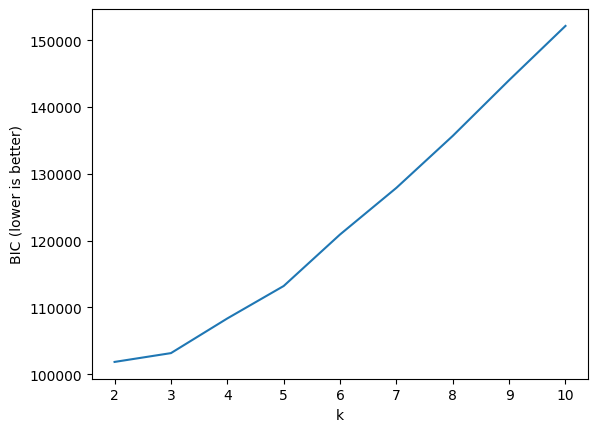

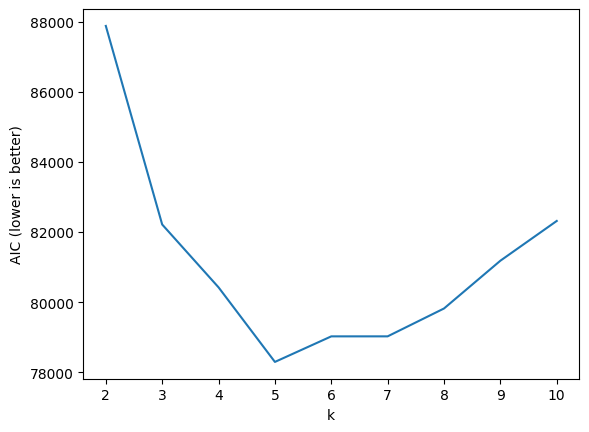

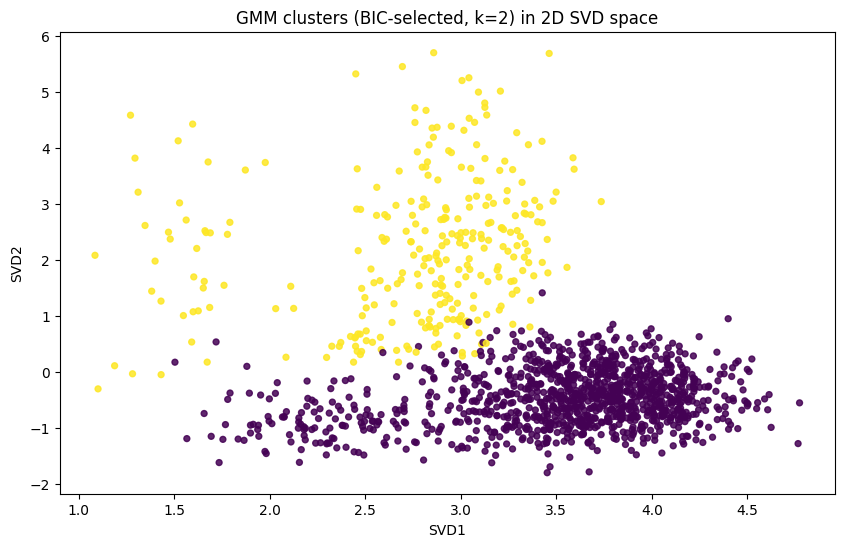

Cluster counts (BIC-selected): {0: 1145, 1: 288}


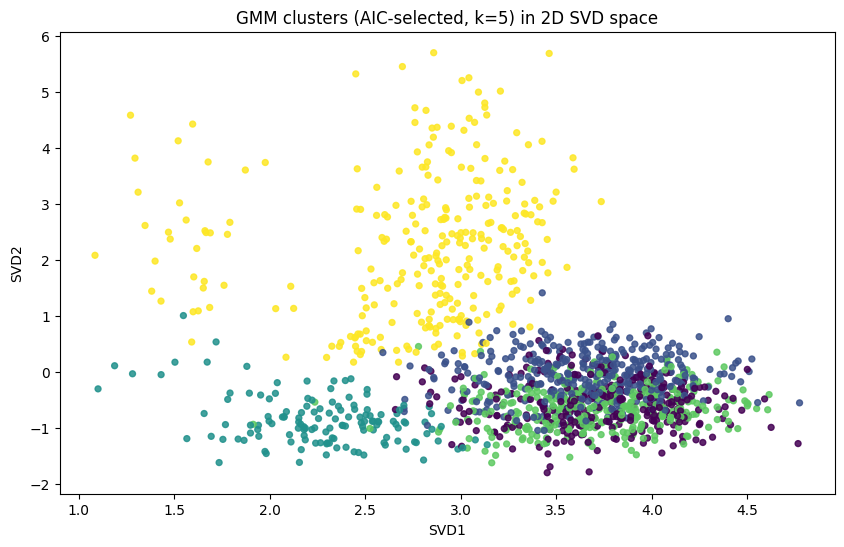

Cluster counts (AIC-selected): {0: 304, 1: 371, 2: 137, 3: 339, 4: 282}

Top variables driving SVD1 (absolute loadings):


,SVD1_loading_abs
Do you have previous employers?,0.263501
Is your employer primarily a tech company/organization?,0.234073
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.219207
gender_Male,0.210631
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_NoneDid,0.187390
yn__Would you bring up a mental health issue with a potential employer in an interview?_No,0.179876
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.178006
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_NoneDid,0.176481
Have you ever sought treatment for a mental health issue from a mental health professional?,0.173527
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",0.170841



Top variables driving SVD2 (absolute loadings):


,SVD2_loading_abs
pct_time_affected_ord,0.674921
Are you self-employed?,0.262566
What is your age?,0.227886
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.220542
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.206256
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",0.157037
role_One-person shop,0.135443
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,0.122274
Have you ever sought treatment for a mental health issue from a mental health professional?,0.117016
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_Yes,0.109074



### Reasons for BIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=1145) top 15 enriched features ---


,lift,cluster_rate,global_rate
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",1.251528,0.710044,0.567341
yn__Does your employer offer resources to learn more about mental health concerns and options for seeking help?_No,1.251528,0.463755,0.370551
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,1.251528,0.373799,0.298674
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_No,1.251528,0.342358,0.273552
yn__Do you feel that your employer takes mental health as seriously as physical health?_Yes,1.251528,0.305677,0.244243
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.251528,0.293450,0.234473
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_Yes,1.251528,0.279476,0.223308
mhcare_options_Yes,1.251528,0.268122,0.214236
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,1.251528,0.264629,0.211445
benefits_No,1.251528,0.258515,0.206560



--- Cluster 1 (n=288) top 15 enriched features ---


,lift,cluster_rate,global_rate
Are you self-employed?,4.975694,0.996528,0.200279
pct_time_affected_ord,4.975694,0.708333,0.142359
role_One-person shop,4.264881,0.479167,0.112352
role_Sales,3.210125,0.069444,0.021633
role_Executive Leadership,2.069101,0.145833,0.070482
remote_Always,1.827806,0.437500,0.239358
role_Designer,1.695422,0.159722,0.094208
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",1.530983,0.069444,0.045359
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.513308,0.663194,0.438241
mhatt__Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_Observed,1.338160,0.246528,0.184229



### Reasons for AIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=304) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_AllDid,3.142544,0.111842,0.035590
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,3.142544,0.072368,0.023029
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_SomeDid,2.514035,0.447368,0.177948
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_Sometimes,2.416326,0.200658,0.083043
prev6__Did you feel that your previous employers took mental health as seriously as physical health?_AllDid,2.411720,0.072368,0.030007
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_SomeDid,2.401378,0.621711,0.258897
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_YesAlways,2.356908,0.269737,0.114445
prev6__Have your previous employers provided mental health benefits?_AllDid,2.331834,0.305921,0.131193
prev6__Were you aware of the options for mental health care provided by your previous employers?_AwareSome,2.307806,0.618421,0.267969
prev6__Have your previous employers provided mental health benefits?_SomeDid,2.302657,0.628289,0.272854



--- Cluster 1 (n=371) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_Yes,3.203077,0.091644,0.028611
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",2.585934,0.212938,0.082345
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_Yes,2.459348,0.439353,0.178646
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,2.414084,0.566038,0.234473
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_No,2.335256,0.638814,0.273552
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_Yes,2.285989,0.156334,0.068388
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_All,2.204721,0.347709,0.157711
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_Yes,2.187322,0.679245,0.310537
prevneg__Do you think that discussing a physical health issue with previous employers would have negative consequences?_All,2.140052,0.110512,0.051640
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,2.116108,0.447439,0.211445



--- Cluster 2 (n=137) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No,2.241397,0.131387,0.058618
remote_Never,1.790425,0.416058,0.232380
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.712178,0.401460,0.234473
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatEasy",1.600618,0.313869,0.196092
company_size_1-5,1.568978,0.065693,0.041870
benefits_No,1.554843,0.321168,0.206560
company_size_>1000,1.552635,0.277372,0.178646
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotOpen,1.534112,0.080292,0.052338
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",1.506928,0.124088,0.082345
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,1.484402,0.313869,0.211445



--- Cluster 3 (n=339) top 15 enriched features ---


,lift,cluster_rate,global_rate
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryEasy",1.998284,0.306785,0.153524
prev6__Were you aware of the options for mental health care provided by your previous employers?_NotAware,1.990096,0.808260,0.406141
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_No,1.895291,0.525074,0.277041
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,1.846904,0.551622,0.298674
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_Yes,1.844570,0.353982,0.191905
prev6__Would you have been willing to discuss a mental health issue with your direct supervisor(s)?_All,1.818124,0.117994,0.064899
yn__Do you feel that your employer takes mental health as seriously as physical health?_Yes,1.811631,0.442478,0.244243
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_No,1.791160,0.221239,0.123517
yn__Would you bring up a mental health issue with a potential employer in an interview?_Yes,1.698404,0.132743,0.078158
prev6__Have your previous employers provided mental health benefits?_NoneDid,1.636312,0.424779,0.259595



--- Cluster 4 (n=282) top 15 enriched features ---


,lift,cluster_rate,global_rate
pct_time_affected_ord,5.081560,0.723404,0.142359
Are you self-employed?,4.975326,0.996454,0.200279
role_One-person shop,4.324061,0.485816,0.112352
role_Sales,3.278426,0.070922,0.021633
role_Executive Leadership,2.062812,0.145390,0.070482
remote_Always,1.866696,0.446809,0.239358
role_Designer,1.731495,0.163121,0.094208
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",1.563557,0.070922,0.045359
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.496956,0.656028,0.438241
mhatt__Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_Observed,1.366632,0.251773,0.184229


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture

# -----------------------------
# 1) Load data
# -----------------------------
file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)

print("Original shape:", df.shape)

drop_prefixes = ("live_country_", "work_country_", "mhcond_")
cols_to_drop = [c for c in df.columns if c.startswith(drop_prefixes)]

print("Original shape:", df.shape)
print("Dropping:", len(cols_to_drop))
print("Examples:", cols_to_drop[:20])

df = df.drop(columns=cols_to_drop, errors="ignore")

print("New shape:", df.shape)

# Drop columns that contain "Unknown" in the *title*
unknown_cols = [c for c in df.columns if "Unknown" in str(c)]
df = df.drop(columns=unknown_cols)
print("After dropping 'Unknown' columns:", df.shape)

# Ensure numeric (one-hot should already be 0/1). Any weird cells -> 0
X_df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

# Keep age + pct_time_affected_ord (scale them)
num_cols = [c for c in ["What is your age?", "pct_time_affected_ord"] if c in X_df.columns]
if num_cols:
    X_df[num_cols] = StandardScaler().fit_transform(X_df[num_cols])

X = X_df.values

# -----------------------------
# 2) TruncatedSVD reduction
# -----------------------------
n_svd = min(50, X.shape[1] - 1) if X.shape[1] > 1 else 1
svd = TruncatedSVD(n_components=n_svd, random_state=42)
Z = svd.fit_transform(X)

print("SVD dims:", Z.shape[1])
print("Explained variance ratio (first 10):", np.round(svd.explained_variance_ratio_[:10], 4))
print("Cumulative explained variance:", float(svd.explained_variance_ratio_.sum()))

# -----------------------------
# 3) Pick k with BIC/AIC (GMM)
# -----------------------------
ks = range(2, 11)
bics, aics = [], []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=5)
    gmm.fit(Z)
    bics.append(gmm.bic(Z))
    aics.append(gmm.aic(Z))

best_k_bic = int(list(ks)[int(np.argmin(bics))])
best_k_aic = int(list(ks)[int(np.argmin(aics))])

print("Best k by BIC:", best_k_bic)
print("Best k by AIC:", best_k_aic)

plt.figure()
plt.plot(list(ks), bics)
plt.xlabel("k")
plt.ylabel("BIC (lower is better)")
plt.show()

plt.figure()
plt.plot(list(ks), aics)
plt.xlabel("k")
plt.ylabel("AIC (lower is better)")
plt.show()

# -----------------------------
# 4) Fit GMM twice: BIC-k and AIC-k
# -----------------------------
def fit_and_plot(k, title_suffix):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=10)
    labels = gmm.fit_predict(Z)

    plt.figure(figsize=(10, 6))
    plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=18, alpha=0.85)
    plt.title(f"GMM clusters ({title_suffix}, k={k}) in 2D SVD space")
    plt.xlabel("SVD1")
    plt.ylabel("SVD2")
    plt.show()

    counts = pd.Series(labels).value_counts().sort_index()
    print(f"Cluster counts ({title_suffix}):", counts.to_dict())

    return labels, gmm

labels_bic, gmm_bic = fit_and_plot(best_k_bic, "BIC-selected")
labels_aic, gmm_aic = fit_and_plot(best_k_aic, "AIC-selected")

# -----------------------------
# 5) Global “most important” features driving SVD1/SVD2
# -----------------------------
feature_names = X_df.columns.to_list()

def top_loadings(component_idx, top_n=20):
    load = svd.components_[component_idx]
    s = pd.Series(np.abs(load), index=feature_names).sort_values(ascending=False).head(top_n)
    return s

print("\nTop variables driving SVD1 (absolute loadings):")
display(top_loadings(0, 20).to_frame("SVD1_loading_abs"))

if Z.shape[1] >= 2:
    print("\nTop variables driving SVD2 (absolute loadings):")
    display(top_loadings(1, 20).to_frame("SVD2_loading_abs"))

# -----------------------------
# 6) NEW: Cluster “reasons” = feature enrichment per cluster
#     (works best for one-hot columns; numeric columns are handled but interpret carefully)
# -----------------------------
def cluster_reasons(X_df, labels, top_n=15, min_global_rate=0.02, eps=1e-9):
    """
    Prints per-cluster top features by lift:
      lift = P(feature>0 | cluster) / P(feature>0 | all)
    min_global_rate filters out extremely rare features to avoid noisy "infinite lift" artifacts.
    """
    Xbin = (X_df > 0).astype(int)  # treat any positive as present

    global_rate = Xbin.mean(axis=0)  # P(feature=1) overall
    keep = global_rate[global_rate >= min_global_rate].index.tolist()

    Xbin_k = Xbin[keep]
    global_rate_k = global_rate[keep]

    print("\n==================== CLUSTER REASONS ====================")
    for cl in sorted(pd.unique(labels)):
        idx = (labels == cl)
        n = int(idx.sum())
        if n == 0:
            continue

        cl_rate = Xbin_k.loc[idx].mean(axis=0)  # P(feature=1 | cluster)
        lift = (cl_rate + eps) / (global_rate_k + eps)

        out = pd.DataFrame({
            "lift": lift,
            "cluster_rate": cl_rate,
            "global_rate": global_rate_k
        }).sort_values("lift", ascending=False).head(top_n)

        print(f"\n--- Cluster {cl} (n={n}) top {top_n} enriched features ---")
        display(out)

# Show “reasons” for BOTH solutions
print("\n### Reasons for BIC-selected clustering ###")
cluster_reasons(X_df, labels_bic, top_n=15, min_global_rate=0.02)

print("\n### Reasons for AIC-selected clustering ###")
cluster_reasons(X_df, labels_aic, top_n=15, min_global_rate=0.02)

Original shape: (1433, 204)
Dropping: 49
Examples: ['live_country_Australia', 'live_country_Brazil', 'live_country_Canada', 'live_country_France', 'live_country_Germany', 'live_country_Ireland', 'live_country_Midwest', 'live_country_Netherlands', 'live_country_Northeast', 'live_country_Other', 'live_country_Russia', 'live_country_South America', 'live_country_Sweden', 'live_country_Switzerland', 'live_country_United Kingdom', 'live_country_West America', 'work_country_Australia', 'work_country_Brazil', 'work_country_Canada', 'work_country_France']
After dropping location + mhcond: (1433, 155)
After dropping 'Unknown' columns: (1433, 121)
SVD dims: 50
Explained variance ratio (first 10): [0.0213 0.0827 0.0654 0.0557 0.0473 0.034  0.0288 0.025  0.0227 0.0217]
Cumulative explained variance: 0.8328190831130015
Best k by silhouette: 2


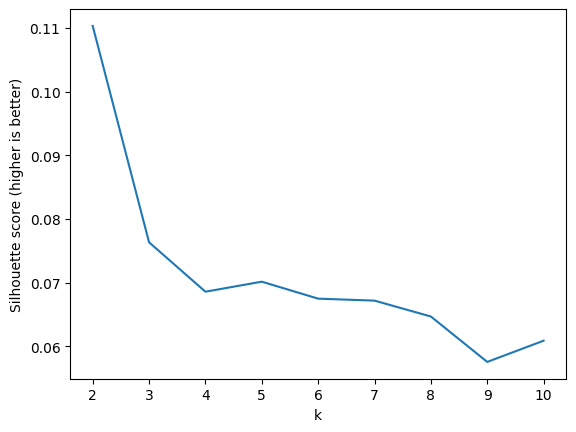

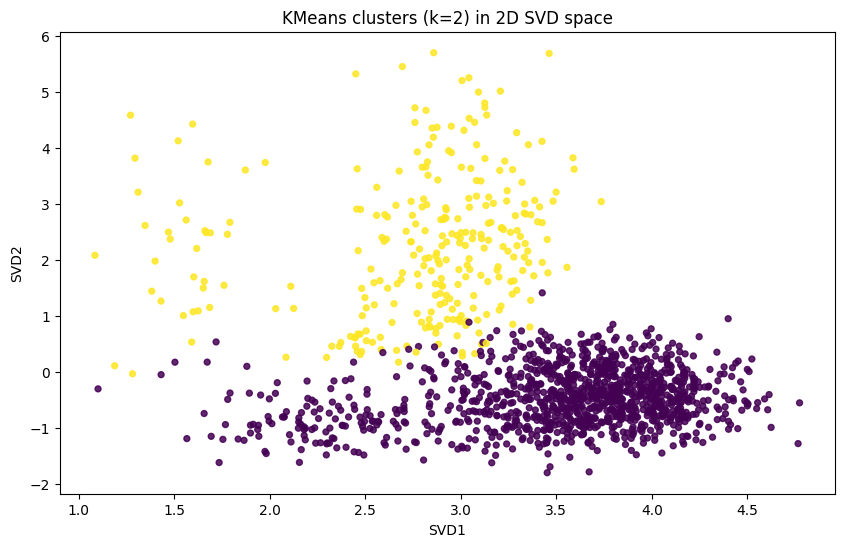

Cluster counts (KMeans): {0: 1151, 1: 282}

Top variables driving SVD1 (absolute loadings):


,SVD1_loading_abs
Do you have previous employers?,0.263501
Is your employer primarily a tech company/organization?,0.234073
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.219207
gender_Male,0.210631
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_NoneDid,0.187390
yn__Would you bring up a mental health issue with a potential employer in an interview?_No,0.179876
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.178006
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_NoneDid,0.176481
Have you ever sought treatment for a mental health issue from a mental health professional?,0.173527
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",0.170841



Top variables driving SVD2 (absolute loadings):


,SVD2_loading_abs
pct_time_affected_ord,0.674921
Are you self-employed?,0.262566
What is your age?,0.227886
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,0.220542
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,0.206256
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",0.157037
role_One-person shop,0.135443
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,0.122274
Have you ever sought treatment for a mental health issue from a mental health professional?,0.117016
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_Yes,0.109074



### Reasons for KMeans clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=1151) top 15 enriched features ---


,lift,cluster_rate,global_rate
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No",1.245004,0.706342,0.567341
yn__Does your employer offer resources to learn more about mental health concerns and options for seeking help?_No,1.245004,0.461338,0.370551
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,1.245004,0.371851,0.298674
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_No,1.245004,0.340573,0.273552
yn__Do you feel that your employer takes mental health as seriously as physical health?_Yes,1.245004,0.304083,0.244243
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.245004,0.291920,0.234473
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_Yes,1.245004,0.278019,0.223308
mhcare_options_Yes,1.245004,0.266725,0.214236
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,1.245004,0.263249,0.211445
benefits_No,1.245004,0.257168,0.206560



--- Cluster 1 (n=282) top 15 enriched features ---


,lift,cluster_rate,global_rate
pct_time_affected_ord,5.081560,0.723404,0.142359
Are you self-employed?,4.975326,0.996454,0.200279
role_One-person shop,4.355623,0.489362,0.112352
role_Sales,3.278426,0.070922,0.021633
role_Executive Leadership,2.113124,0.148936,0.070482
remote_Always,1.866696,0.446809,0.239358
role_Designer,1.731495,0.163121,0.094208
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",1.563557,0.070922,0.045359
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.496956,0.656028,0.438241
mhatt__Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_Observed,1.347383,0.248227,0.184229


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -----------------------------
# 1) Load data
# -----------------------------
file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)

print("Original shape:", df.shape)

drop_prefixes = ("live_country_", "work_country_", "mhcond_")
cols_to_drop = [c for c in df.columns if str(c).startswith(drop_prefixes)]

print("Dropping:", len(cols_to_drop))
print("Examples:", cols_to_drop[:20])

df = df.drop(columns=cols_to_drop, errors="ignore")
print("After dropping location + mhcond:", df.shape)

# Drop columns that contain "Unknown" in the *title*
unknown_cols = [c for c in df.columns if "Unknown" in str(c)]
df = df.drop(columns=unknown_cols, errors="ignore")
print("After dropping 'Unknown' columns:", df.shape)

# Ensure numeric (one-hot should already be 0/1). Any weird cells -> 0
X_df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

# Keep age + pct_time_affected_ord (scale them)
num_cols = [c for c in ["What is your age?", "pct_time_affected_ord"] if c in X_df.columns]
if num_cols:
    X_df[num_cols] = StandardScaler().fit_transform(X_df[num_cols])

X = X_df.values

# -----------------------------
# 2) TruncatedSVD reduction
# -----------------------------
n_svd = min(50, X.shape[1] - 1) if X.shape[1] > 1 else 1
svd = TruncatedSVD(n_components=n_svd, random_state=42)
Z = svd.fit_transform(X)

print("SVD dims:", Z.shape[1])
print("Explained variance ratio (first 10):", np.round(svd.explained_variance_ratio_[:10], 4))
print("Cumulative explained variance:", float(svd.explained_variance_ratio_.sum()))

# -----------------------------
# 3) Pick k for KMeans using Silhouette
# -----------------------------
ks = range(2, 11)
sils = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(Z)
    sils.append(silhouette_score(Z, labels))

best_k_sil = int(list(ks)[int(np.argmax(sils))])
print("Best k by silhouette:", best_k_sil)

plt.figure()
plt.plot(list(ks), sils)
plt.xlabel("k")
plt.ylabel("Silhouette score (higher is better)")
plt.show()

# -----------------------------
# 4) Fit + plot KMeans at best k
# -----------------------------
km = KMeans(n_clusters=best_k_sil, random_state=42, n_init=50)
labels_km = km.fit_predict(Z)

plt.figure(figsize=(10, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=labels_km, s=18, alpha=0.85)
plt.title(f"KMeans clusters (k={best_k_sil}) in 2D SVD space")
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.show()

counts = pd.Series(labels_km).value_counts().sort_index()
print("Cluster counts (KMeans):", counts.to_dict())

# -----------------------------
# 5) Global “most important” features driving SVD1/SVD2
# -----------------------------
feature_names = X_df.columns.to_list()

def top_loadings(component_idx, top_n=20):
    load = svd.components_[component_idx]
    return pd.Series(np.abs(load), index=feature_names).sort_values(ascending=False).head(top_n)

print("\nTop variables driving SVD1 (absolute loadings):")
display(top_loadings(0, 20).to_frame("SVD1_loading_abs"))

if Z.shape[1] >= 2:
    print("\nTop variables driving SVD2 (absolute loadings):")
    display(top_loadings(1, 20).to_frame("SVD2_loading_abs"))

# -----------------------------
# 6) Cluster “reasons” = feature enrichment per cluster
# -----------------------------
def cluster_reasons(X_df, labels, top_n=15, min_global_rate=0.02, eps=1e-9):
    """
    Per-cluster top features by lift:
      lift = P(feature>0 | cluster) / P(feature>0 | all)
    min_global_rate filters rare features so you don't get noisy huge lifts.
    """
    Xbin = (X_df > 0).astype(int)

    global_rate = Xbin.mean(axis=0)
    keep = global_rate[global_rate >= min_global_rate].index.tolist()

    Xbin_k = Xbin[keep]
    global_rate_k = global_rate[keep]

    print("\n==================== CLUSTER REASONS ====================")
    for cl in sorted(pd.unique(labels)):
        idx = (labels == cl)
        n = int(idx.sum())
        if n == 0:
            continue

        cl_rate = Xbin_k.loc[idx].mean(axis=0)
        lift = (cl_rate + eps) / (global_rate_k + eps)

        out = pd.DataFrame({
            "lift": lift,
            "cluster_rate": cl_rate,
            "global_rate": global_rate_k
        }).sort_values("lift", ascending=False).head(top_n)

        print(f"\n--- Cluster {cl} (n={n}) top {top_n} enriched features ---")
        display(out)

print("\n### Reasons for KMeans clustering ###")
cluster_reasons(X_df, labels_km, top_n=15, min_global_rate=0.02)


Original shape: (1433, 204)
After dropping location + mhcond: (1433, 155)
After dropping 'Unknown' columns: (1433, 121)
MCA engine used: sklearn
MCA dims: 20
Best k by BIC: 4
Best k by AIC: 10


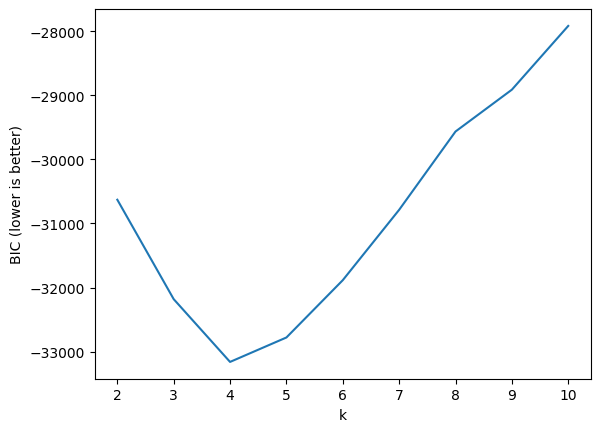

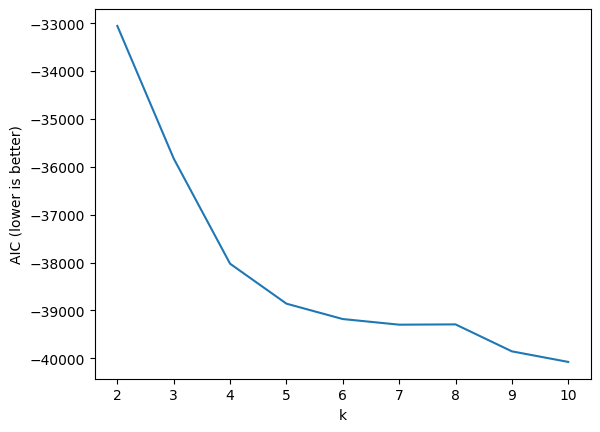

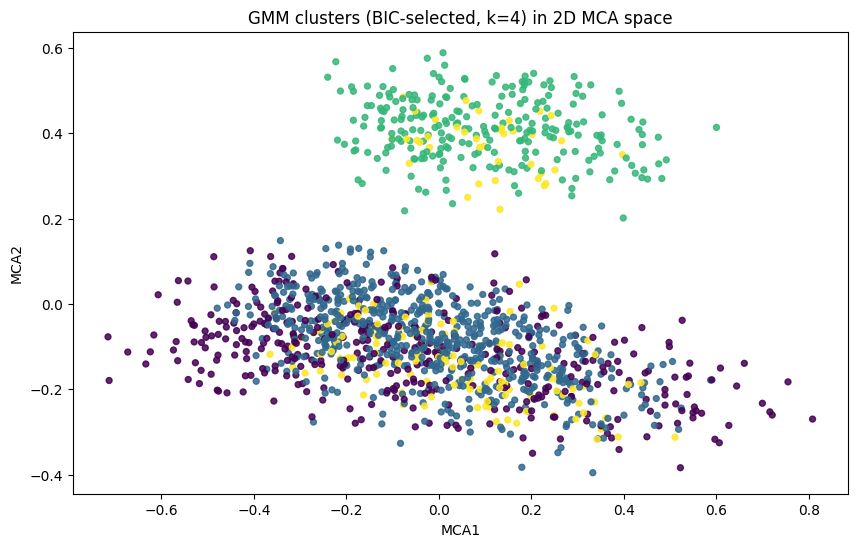

Cluster counts (BIC-selected): {0: 379, 1: 636, 2: 249, 3: 169}


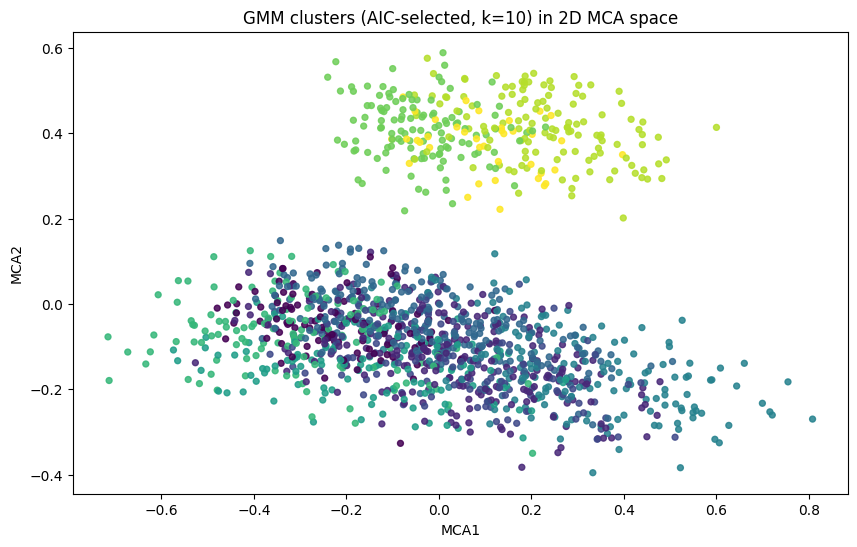

Cluster counts (AIC-selected): {0: 105, 1: 236, 2: 131, 3: 252, 4: 165, 5: 126, 6: 131, 7: 123, 8: 126, 9: 38}

### Reasons for BIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=379) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_AllDid,3.558591,0.126649,0.035590
prev6__Did you feel that your previous employers took mental health as seriously as physical health?_AllDid,3.341351,0.100264,0.030007
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,3.322699,0.076517,0.023029
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_Yes,3.135466,0.089710,0.028611
prev6__Would you have been willing to discuss a mental health issue with your direct supervisor(s)?_All,3.130508,0.203166,0.064899
prev6__Would you have been willing to discuss a mental health issue with your previous co-workers?_All,2.976534,0.195251,0.065597
prevneg__Do you think that discussing a physical health issue with previous employers would have negative consequences?_All,2.708015,0.139842,0.051640
prev6__Have your previous employers provided mental health benefits?_AllDid,2.694970,0.353562,0.131193
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_None,2.676816,0.211082,0.078856
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_Yes,2.546390,0.174142,0.068388



--- Cluster 1 (n=636) top 15 enriched features ---


,lift,cluster_rate,global_rate
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatDifficult",1.517193,0.210692,0.138870
company_size_500-1000,1.380051,0.077044,0.055827
prev6__Have your previous employers provided mental health benefits?_SomeDid,1.354192,0.369497,0.272854
mhcare_options_No,1.336611,0.330189,0.247034
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_No,1.324367,0.968553,0.731333
prev6__Were you aware of the options for mental health care provided by your previous employers?_NotAware,1.324013,0.537736,0.406141
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_Some,1.322578,0.567610,0.429170
company_size_100-500,1.317363,0.227987,0.173064
company_size_26-100,1.304046,0.265723,0.203768
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_No,1.297510,0.757862,0.584089



--- Cluster 2 (n=249) top 15 enriched features ---


,lift,cluster_rate,global_rate
Are you self-employed?,4.993031,1.000000,0.200279
pct_time_affected_ord,4.908694,0.698795,0.142359
role_One-person shop,4.360947,0.489960,0.112352
role_Sales,3.527270,0.076305,0.021633
role_Executive Leadership,2.108275,0.148594,0.070482
remote_Always,1.912747,0.457831,0.239358
role_Designer,1.833080,0.172691,0.094208
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.512067,0.662651,0.438241
prevneg__Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?_All,1.485166,0.064257,0.043266
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotApplicable,1.438755,0.112450,0.078158



--- Cluster 3 (n=169) top 15 enriched features ---


,lift,cluster_rate,global_rate
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",1.826309,0.082840,0.045359
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No,1.816991,0.106509,0.058618
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotOpen,1.582801,0.082840,0.052338
remote_Never,1.451410,0.337278,0.232380
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.387979,0.325444,0.234473
gender_Other,1.384374,0.047337,0.034194
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatEasy",1.297543,0.254438,0.196092
mhatt__Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_No,1.286100,0.508876,0.395673
company_size_1-5,1.271893,0.053254,0.041870
benefits_No,1.260435,0.260355,0.206560



### Reasons for AIC-selected clustering ###

==================== CLUSTER REASONS ====================

--- Cluster 0 (n=105) top 15 enriched features ---


,lift,cluster_rate,global_rate
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_No,3.161313,0.390476,0.123517
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryEasy",3.101732,0.476190,0.153524
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_Yes",3.085549,0.495238,0.160502
yn__Would you feel comfortable discussing a mental health disorder with your coworkers?_Yes,3.076918,0.590476,0.191905
yn__Would you bring up a mental health issue with a potential employer in an interview?_Yes,3.046344,0.238095,0.078158
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes,2.933600,0.876190,0.298674
yn__Do you feel that your employer takes mental health as seriously as physical health?_Yes,2.846503,0.695238,0.244243
prevneg__Do you think that discussing a physical health issue with previous employers would have negative consequences?_All,2.766409,0.142857,0.051640
mhatt__Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?_No,2.475135,0.685714,0.277041
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_Yes,2.303036,0.514286,0.223308



--- Cluster 1 (n=236) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev6__Have your previous employers provided mental health benefits?_SomeDid,2.733192,0.745763,0.272854
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_Sometimes,2.449224,0.203390,0.083043
prev6__Were you aware of the options for mental health care provided by your previous employers?_AwareSome,2.419326,0.648305,0.267969
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_SomeDid,2.333566,0.415254,0.177948
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_SomeDid,2.209500,0.572034,0.258897
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",1.903943,0.156780,0.082345
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatDifficult",1.861277,0.258475,0.138870
prev6__Were you aware of the options for mental health care provided by your previous employers?_AwareLater,1.764523,0.144068,0.081647
company_size_100-500,1.664913,0.288136,0.173064
prevneg__Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?_Some,1.586387,0.491525,0.309839



--- Cluster 2 (n=131) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No,2.344057,0.137405,0.058618
remote_Never,1.839580,0.427481,0.232380
yn__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_No,1.790599,0.419847,0.234473
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_SomewhatEasy",1.673929,0.328244,0.196092
company_size_1-5,1.640840,0.068702,0.041870
benefits_No,1.626057,0.335878,0.206560
company_size_>1000,1.623748,0.290076,0.178646
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotOpen,1.604377,0.083969,0.052338
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",1.575948,0.129771,0.082345
yn__Do you feel that your employer takes mental health as seriously as physical health?_No,1.552390,0.328244,0.211445



--- Cluster 3 (n=252) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev6__Were you aware of the options for mental health care provided by your previous employers?_NotAware,2.149539,0.873016,0.406141
prev6__Have your previous employers provided mental health benefits?_NoneDid,1.926075,0.500000,0.259595
benefits_No,1.748217,0.361111,0.206560
company_size_500-1000,1.705952,0.095238,0.055827
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_NoneDid,1.661379,0.976190,0.587579
mhcare_options_No,1.638485,0.404762,0.247034
prevneg__Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?_None,1.612928,0.853175,0.528960
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotApplicable,1.523172,0.119048,0.078158
remote_Never,1.519817,0.353175,0.232380
company_size_6-25,1.489324,0.218254,0.146546



--- Cluster 4 (n=165) top 15 enriched features ---


,lift,cluster_rate,global_rate
yn__Do you think that discussing a physical health issue with your employer would have negative consequences?_Yes,6.354767,0.181818,0.028611
prevneg__Do you think that discussing a physical health issue with previous employers would have negative consequences?_All,4.694513,0.242424,0.051640
yn__Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?_Yes,4.431045,0.303030,0.068388
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_No,3.588780,0.303030,0.084438
prevneg__Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?_All,3.501955,0.151515,0.043266
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_All,3.496996,0.551515,0.157711
"mhatt__If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:_VeryDifficult",3.164818,0.260606,0.082345
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_Yes,3.155043,0.563636,0.178646
yn__Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No,2.894949,0.169697,0.058618
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",2.672261,0.121212,0.045359



--- Cluster 5 (n=126) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_AllDid,5.798008,0.206349,0.035590
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,4.824916,0.111111,0.023029
prev6__Have your previous employers provided mental health benefits?_AllDid,3.448202,0.452381,0.131193
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_YesAlways,3.051297,0.349206,0.114445
prev6__Were you aware of the options for mental health care provided by your previous employers?_AwareAll,3.016048,0.380952,0.126308
yn__Does your employer offer resources to learn more about mental health concerns and options for seeking help?_Yes,3.007102,0.619048,0.205862
"yn__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_Yes",2.818530,0.452381,0.160502
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_SomeDid,2.720604,0.484127,0.177948
mhcare_options_Yes,2.593196,0.555556,0.214236
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_SomeDid,2.421747,0.626984,0.258897



--- Cluster 6 (n=131) top 15 enriched features ---


,lift,cluster_rate,global_rate
prev6__Would you have been willing to discuss a mental health issue with your direct supervisor(s)?_All,8.115981,0.526718,0.064899
prev6__Did you feel that your previous employers took mental health as seriously as physical health?_AllDid,7.886206,0.236641,0.030007
prev6__Would you have been willing to discuss a mental health issue with your previous co-workers?_All,6.749553,0.442748,0.065597
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_None,6.582720,0.519084,0.078856
prev__Did your previous employers provide resources to learn more about mental health issues and how to seek help?_AllDid,3.860799,0.137405,0.035590
prev__Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_AllDid,3.646310,0.083969,0.023029
yn__Would you bring up a mental health issue with a potential employer in an interview?_Yes,2.734733,0.213740,0.078158
prev6__Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_YesAlways,2.401229,0.274809,0.114445
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_No,2.286669,0.282443,0.123517
prev6__Have your previous employers provided mental health benefits?_AllDid,2.269246,0.297710,0.131193



--- Cluster 7 (n=123) top 15 enriched features ---


,lift,cluster_rate,global_rate
Are you self-employed?,4.993031,1.000000,0.200279
pct_time_affected_ord,3.769249,0.536585,0.142359
role_One-person shop,3.762864,0.422764,0.112352
role_Sales,3.382376,0.073171,0.021633
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotApplicable,2.288473,0.178862,0.078158
role_Executive Leadership,2.191661,0.154472,0.070482
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.836609,0.804878,0.438241
prev6__Would you have been willing to discuss a mental health issue with your previous co-workers?_All,1.735167,0.113821,0.065597
remote_Always,1.528479,0.365854,0.239358
prev6__Would you have been willing to discuss a mental health issue with your direct supervisor(s)?_Some,1.478568,0.674797,0.456385



--- Cluster 8 (n=126) top 15 enriched features ---


,lift,cluster_rate,global_rate
pct_time_affected_ord,6.021008,0.857143,0.142359
Are you self-employed?,4.993031,1.000000,0.200279
role_One-person shop,4.944789,0.555556,0.112352
role_Sales,3.668715,0.079365,0.021633
prevneg__Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?_All,2.751536,0.119048,0.043266
prevneg__Do you think that discussing a mental health disorder with previous employers would have negative consequences?_All,2.566477,0.404762,0.157711
remote_Always,2.287866,0.547619,0.239358
role_Designer,2.190359,0.206349,0.094208
role_Executive Leadership,2.026874,0.142857,0.070482
prev6__Have your previous employers provided mental health benefits?_NoneDid,1.987221,0.515873,0.259595



--- Cluster 9 (n=38) top 15 enriched features ---


,lift,cluster_rate,global_rate
pct_time_affected_ord,5.545666,0.789474,0.142359
"interf__If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Often",5.221457,0.236842,0.045359
Are you self-employed?,4.993031,1.000000,0.200279
role_One-person shop,3.747630,0.421053,0.112352
role_Executive Leadership,1.866858,0.131579,0.070482
mhatt__Do you feel that being identified as a person with a mental health issue would hurt your career?_No,1.704431,0.210526,0.123517
mhatt__How willing would you be to share with friends and family that you have a mental illness?_SomewhatNotOpen,1.585957,0.236842,0.149337
gender_Other,1.539205,0.052632,0.034194
mhatt__How willing would you be to share with friends and family that you have a mental illness?_NotOpen,1.508421,0.078947,0.052338
yn__Do you think that discussing a mental health disorder with your employer would have negative consequences?_No,1.501215,0.657895,0.438241


In [14]:
!pip -q install pandas openpyxl scikit-learn prince

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import prince
from sklearn.mixture import GaussianMixture

# -----------------------------
# 1) Load data
# -----------------------------
file_path = r"C:\Users\123wi\OneDrive\Desktop\duits uni\unsupervised\project\mental_health_processed.xlsx"
df = pd.read_excel(file_path)
print("Original shape:", df.shape)

# Drop location + mhcond columns
drop_prefixes = ("live_country_", "work_country_", "mhcond_")
cols_to_drop = [c for c in df.columns if str(c).startswith(drop_prefixes)]
df = df.drop(columns=cols_to_drop, errors="ignore")
print("After dropping location + mhcond:", df.shape)

# Drop columns with "Unknown" in the title
unknown_cols = [c for c in df.columns if "Unknown" in str(c)]
df = df.drop(columns=unknown_cols, errors="ignore")
print("After dropping 'Unknown' columns:", df.shape)

# Numeric + fill missing -> 0
X_df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

# Convert to categorical strings for MCA
X_mca = X_df.copy()
for c in X_mca.columns:
    X_mca[c] = X_mca[c].astype(int).astype(str)

# -----------------------------
# 2) MCA reduction
# -----------------------------
n_mca = 20

def fit_mca(engine_name):
    mca = prince.MCA(
        n_components=n_mca,
        n_iter=10,
        copy=True,
        check_input=True,
        engine=engine_name,   # <-- FIX: must be sklearn/scipy/fbpca
        random_state=42
    )
    Z = mca.fit(X_mca).transform(X_mca).to_numpy()
    return mca, Z

try:
    mca, Z = fit_mca("sklearn")
    print("MCA engine used: sklearn")
except Exception as e:
    print("sklearn engine failed, trying scipy. Error was:", repr(e))
    mca, Z = fit_mca("scipy")
    print("MCA engine used: scipy")

print("MCA dims:", Z.shape[1])

Z2 = Z[:, :2]  # 2D for plotting only

# -----------------------------
# 3) Pick k with BIC/AIC (GMM)
# -----------------------------
ks = range(2, 11)
bics, aics = [], []

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=10)
    gmm.fit(Z)
    bics.append(gmm.bic(Z))
    aics.append(gmm.aic(Z))

best_k_bic = int(list(ks)[int(np.argmin(bics))])
best_k_aic = int(list(ks)[int(np.argmin(aics))])

print("Best k by BIC:", best_k_bic)
print("Best k by AIC:", best_k_aic)

plt.figure()
plt.plot(list(ks), bics)
plt.xlabel("k")
plt.ylabel("BIC (lower is better)")
plt.show()

plt.figure()
plt.plot(list(ks), aics)
plt.xlabel("k")
plt.ylabel("AIC (lower is better)")
plt.show()

# -----------------------------
# 4) Fit + plot for BIC and AIC
# -----------------------------
def fit_and_plot(k, title_suffix):
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=42, n_init=20)
    labels = gmm.fit_predict(Z)

    plt.figure(figsize=(10, 6))
    plt.scatter(Z2[:, 0], Z2[:, 1], c=labels, s=18, alpha=0.85)
    plt.title(f"GMM clusters ({title_suffix}, k={k}) in 2D MCA space")
    plt.xlabel("MCA1")
    plt.ylabel("MCA2")
    plt.show()

    counts = pd.Series(labels).value_counts().sort_index()
    print(f"Cluster counts ({title_suffix}):", counts.to_dict())
    return labels, gmm

labels_bic, gmm_bic = fit_and_plot(best_k_bic, "BIC-selected")
labels_aic, gmm_aic = fit_and_plot(best_k_aic, "AIC-selected")

# -----------------------------
# 5) Cluster “reasons” (feature enrichment)
# -----------------------------
def cluster_reasons(X_df, labels, top_n=15, min_global_rate=0.02, eps=1e-9):
    Xbin = (X_df > 0).astype(int)
    global_rate = Xbin.mean(axis=0)
    keep = global_rate[global_rate >= min_global_rate].index.tolist()

    Xbin_k = Xbin[keep]
    global_rate_k = global_rate[keep]

    print("\n==================== CLUSTER REASONS ====================")
    for cl in sorted(pd.unique(labels)):
        idx = (labels == cl)
        n = int(idx.sum())
        if n == 0:
            continue

        cl_rate = Xbin_k.loc[idx].mean(axis=0)
        lift = (cl_rate + eps) / (global_rate_k + eps)

        out = pd.DataFrame({
            "lift": lift,
            "cluster_rate": cl_rate,
            "global_rate": global_rate_k
        }).sort_values("lift", ascending=False).head(top_n)

        print(f"\n--- Cluster {cl} (n={n}) top {top_n} enriched features ---")
        display(out)

print("\n### Reasons for BIC-selected clustering ###")
cluster_reasons(X_df, labels_bic, top_n=15, min_global_rate=0.02)

print("\n### Reasons for AIC-selected clustering ###")
cluster_reasons(X_df, labels_aic, top_n=15, min_global_rate=0.02)
